In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Thu Mar  4 10:46:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 45%   83C    P2   152W / 250W |  10919MiB / 10989MiB |     60%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 31%   45C    P8    15W / 250W |    165MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
import torch
torch.cuda.set_device(1)

In [4]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [5]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [6]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest101e'),
    MixUp(),
]

In [8]:
learn = timm_learner(dls512, 'resnest101e',cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy()).to_fp16()

In [11]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.101348,0.716550,0.672299,0.717500,0.644220,01:01


Better model found at epoch 0 with valid_loss value: 0.7165501117706299.


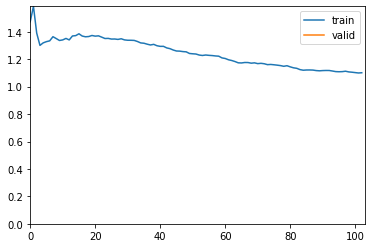

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.992521,0.686741,0.668678,0.746398,0.581369,01:17
1,0.980489,0.684019,0.678938,0.766716,0.579125,01:15
2,0.970242,0.674937,0.679541,0.768657,0.578002,01:16
3,0.953555,0.685609,0.676524,0.772657,0.564534,01:15
4,0.946885,0.653343,0.695836,0.775249,0.611672,01:16
5,0.937621,0.660678,0.691611,0.785285,0.586981,01:16
6,0.909040,0.676417,0.678938,0.788122,0.551066,01:15
7,0.914384,0.645955,0.705492,0.798519,0.604938,01:16
8,0.911877,0.617745,0.712734,0.796853,0.625140,01:16
9,0.904268,0.609935,0.707906,0.769536,0.652076,01:16


Better model found at epoch 0 with valid_loss value: 0.686740517616272.


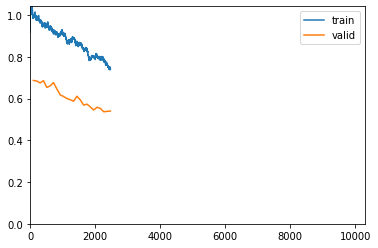

Better model found at epoch 1 with valid_loss value: 0.684018611907959.
Better model found at epoch 2 with valid_loss value: 0.6749372482299805.
Better model found at epoch 4 with valid_loss value: 0.6533432006835938.
Better model found at epoch 7 with valid_loss value: 0.6459553837776184.
Better model found at epoch 8 with valid_loss value: 0.6177445650100708.
Better model found at epoch 9 with valid_loss value: 0.6099352240562439.
Better model found at epoch 10 with valid_loss value: 0.6002019643783569.
Better model found at epoch 11 with valid_loss value: 0.5941367745399475.
Better model found at epoch 12 with valid_loss value: 0.5871490240097046.
Better model found at epoch 15 with valid_loss value: 0.5686101317405701.
Better model found at epoch 17 with valid_loss value: 0.5597429275512695.
Better model found at epoch 18 with valid_loss value: 0.545093297958374.
Better model found at epoch 21 with valid_loss value: 0.5366658568382263.
No improvement since epoch 21: early stopping


In [9]:
learn.fine_tune(100,base_lr=1e-4)

In [10]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [11]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [12]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [13]:
learn.freeze()

In [14]:
learn.dls=dls512

In [18]:
#learn.load('hrnet')

In [19]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.010861,0.765203,0.564220,0.553398,0.537736,00:27


Better model found at epoch 0 with valid_loss value: 0.7652029991149902.


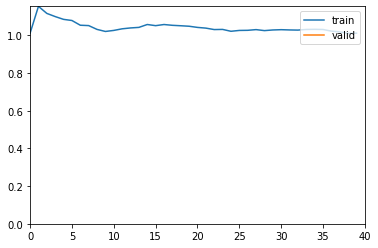

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.010216,0.765307,0.564220,0.554098,0.531447,00:30
1,1.018164,0.765882,0.559633,0.547468,0.544025,00:30
2,1.024262,0.755322,0.584098,0.573718,0.562893,00:30
3,1.005483,0.760708,0.573394,0.568421,0.509434,00:30
4,0.991092,0.756445,0.579511,0.573883,0.525157,00:30
5,1.008712,0.747534,0.574924,0.568027,0.525157,00:31
6,1.006181,0.745413,0.559633,0.548077,0.537736,00:30
7,0.991536,0.744569,0.570336,0.561873,0.528302,00:30
8,0.998076,0.742583,0.576453,0.568562,0.534591,00:30
9,0.995844,0.738408,0.576453,0.566343,0.550314,00:30


Better model found at epoch 0 with valid_loss value: 0.7653067708015442.


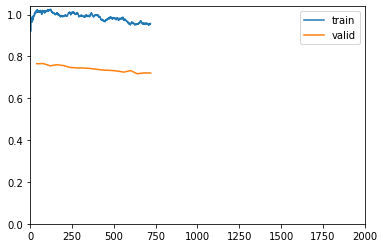

Better model found at epoch 2 with valid_loss value: 0.7553218007087708.
Better model found at epoch 5 with valid_loss value: 0.7475337982177734.
Better model found at epoch 6 with valid_loss value: 0.7454130053520203.
Better model found at epoch 7 with valid_loss value: 0.7445688247680664.
Better model found at epoch 8 with valid_loss value: 0.7425832152366638.
Better model found at epoch 9 with valid_loss value: 0.7384077906608582.
Better model found at epoch 10 with valid_loss value: 0.7347592115402222.
Better model found at epoch 11 with valid_loss value: 0.7334780693054199.
Better model found at epoch 12 with valid_loss value: 0.7305111289024353.
Better model found at epoch 13 with valid_loss value: 0.7250627279281616.
Better model found at epoch 15 with valid_loss value: 0.7174088358879089.
No improvement since epoch 15: early stopping


In [15]:
learn.fine_tune(50,base_lr=1e-5)

In [16]:
learn.dls = dlsTest

In [17]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5873606204986572.


(#4) [0.7141298055648804,0.5873606204986572,0.6614173228346457,0.5526315789473685]